# Transfer Learning 

# VGG 16 

- used by many application. Developed in 2014
- It has 16x convolutional layers
- it has uniform architecture
- The bad thing by VGG16 is the huge number of parameters, 138 million parameters


## architecture
- Conv1
- Conv1
- Pooling
- Conv2
- Conv2
- Pooling
- Conv3
- Conv3
- Conv3
- Pooling
- Conv4
- Conv4
- Conv4
- Pooling
- Conv5
- Conv5
- Conv5
- Pooling
- FC
- FC
- FC
- Output

In [1]:
import keras
import os

from keras.models import Sequential
from keras.layers import Conv2D  # Images are 2D -> Conv2D , if we work with videos --> Conv3D, for time_series 1D
from keras.layers import MaxPool2D  
from keras.layers import Flatten # converting 2D arrays into a single long linear vector
from keras.layers import Dense   # fully connected layer 
from keras.preprocessing.image import ImageDataGenerator # to rescale image, rotate, zoom, flip. etc
from tensorflow.keras.applications.vgg16 import VGG16
import numpy as np 
 

In [2]:
# For training Data --> Rescale 
tr_data = ImageDataGenerator(rescale=1/255) 
train_data = tr_data.flow_from_directory(directory="./dataset/training", target_size=(224,224))


# For test Data --> Rescale
ts_data = ImageDataGenerator(rescale=1/255)  
test_data = ts_data.flow_from_directory(directory="./dataset/testing", target_size=(224,224))




Found 6 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [3]:
# Get Instance of VGG16 model
# https://keras.io/api/applications/vgg/#vgg16-function
# include_top: whether to include the 3 fully-connected layers at the top of the network.


VGG = VGG16(input_shape=(224,224,3), include_top=False, weights="imagenet")

# Dont train the whole layers, just train the last two layers
VGG.trainable = False 





58889256/58889256 [==============================] - 2s 0us/step


In [4]:
model = keras.Sequential(
    [
        VGG,
        keras.layers.Flatten(),
        keras.layers.Dense(units=256,activation="relu"),
        keras.layers.Dense(units=256,activation="relu"),
        keras.layers.Dense(units=2,activation="softmax")
    ]
)



model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy, metrics=["accuracy"])



In [5]:
# Fit the model

hist = model.fit(x=train_data, validation_data = test_data, validation_split = 0.1, epochs = 3)




Epoch 1/3


1/1 [==============================] - 3s 3s/step - loss: 0.7981 - accuracy: 0.5000 - val_loss: 2.2019 - val_accuracy: 0.5000
Epoch 2/3
1/1 [==============================] - 1s 1s/step - loss: 0.3852 - accuracy: 0.8333 - val_loss: 5.4027 - val_accuracy: 0.5000
Epoch 3/3
1/1 [==============================] - 1s 1s/step - loss: 1.9973 - accuracy: 0.5000 - val_loss: 0.5088 - val_accuracy: 0.7500


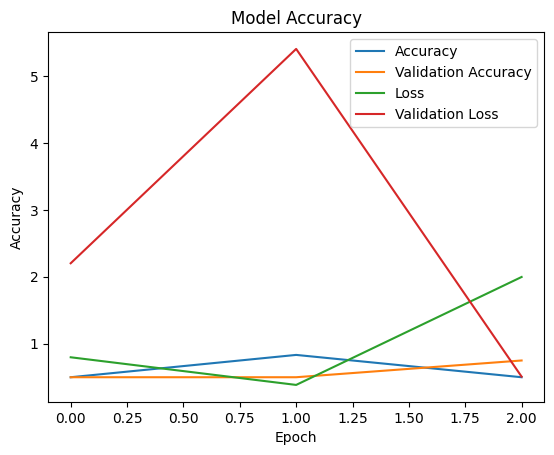

In [6]:
# Visualize the Training Steps

import matplotlib.pyplot as plt  
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Validation Accuracy", "Loss", "Validation Loss"])
plt.show()



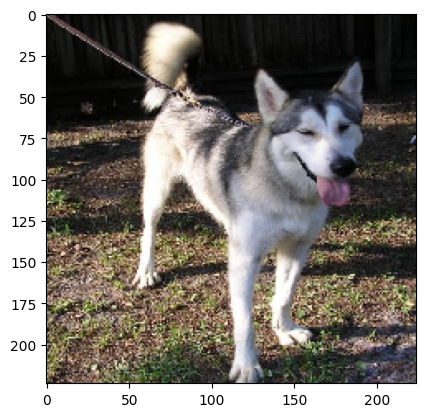

In [7]:
# Test with an input image "cat_or_dog_1.jpg"

from keras.preprocessing import image

img = image.load_img("./dataset/cat_or_dog_2.jpg", target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)

img = np.expand_dims(img, axis=0)



In [8]:
model.predict(img)

1/1 [==============================] - 0s 381ms/step


array([[0., 1.]], dtype=float32)

### 0 - hund [0 1]
### 1 - katze [1 0]

Unser Model hat den Hund richtig erkannt